In [1]:
import matplotlib.pyplot as plt
import pickle

In [39]:
# reading data generate plot
def get_xNy(dirFile,print_every=200):
    with open(dirFile,'r') as f:
        data = f.readlines()
    data = [d.strip('\n').split(' ')[-1] for d in data if 'fr_percent' in d]
    data = [float(d) for d in data]
    x_lst = [x*print_every for x in range(1,1+len(data))]
    return x_lst, data

In [42]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr15/log.txt'
x_lst_fr15, data_fr15 = get_xNy(dirFile)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-log/log.txt'
x_lst, data = get_xNy(dirFile)

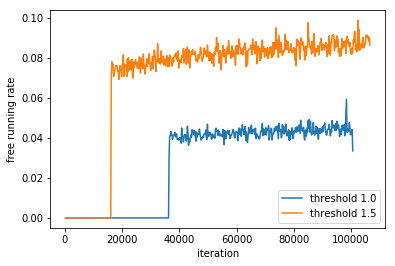

In [45]:
plt.plot(x_lst, data, label='threshold 1.0')
plt.plot(x_lst_fr15, data_fr15, label='threshold 1.5')
plt.xlabel('iteration'); plt.ylabel('free running rate')
plt.legend()
plt.show()

In [13]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr4.0/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
    
print(len(dct_fr_seqs))
print(dct_fr_seqs)

50
{'So I &apos;m going to talk about one experiment that a few dentists in Connecticut cooked up about 30 years ago .': 1, 'How far you can anticipate , what follows from it , what are the threats , what are the possibilities , the challenges , the opportunities ?': 1, 'All you have to do is prove any paranormal , occult or supernatural event or power of any kind under proper observing conditions .': 1, 'That is a huge effect .': 1, 'With friends , we had been sitting and watching match football , and having some good music with <unk> radio , when it started , I think .': 1, 'That &apos;s what you want .': 1, 'But you can have the exact opposite of all of those things -- respect , excitement , a broken Internet connection , mind @-@ numbing monogamy -- and the thing still can go to hell in a hand basket .': 1, 'But memory is not .': 1, 'It was originally written specifically with Twitter in mind .': 1, 'How about -- pick one Thursday once a month and cut that day in half and just say 

In [17]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr1.0-asup/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
    
print(len(dct_fr_seqs))
print(dct_fr_seqs)

72
{'But it &apos;s not .': 1, 'Where can a museum exist as the place for us all to have this conversation ?': 1, 'So I &apos;m going to talk about one experiment that a few dentists in Connecticut cooked up about 30 years ago .': 1, 'You &apos;re married to a guy and he picks his nose ?': 1, 'How far you can anticipate , what follows from it , what are the threats , what are the possibilities , the challenges , the opportunities ?': 1, 'All you have to do is prove any paranormal , occult or supernatural event or power of any kind under proper observing conditions .': 1, 'And because I &apos;ve designed the process and not the form , I can run the process again and again and again to produce a whole family of forms .': 1, 'That is a huge effect .': 1, 'But it turns out , when you look overall at what people regret in life , you know what , our financial decisions don &apos;t even rank .': 1, 'But you can have the exact opposite of all of those things -- respect , excitement , a broken 